Generation 0 - Chosen Path: ['D', 'A', 'C', 'E', 'B'], Attacked Node: A, Dropped Node: A, Shortest Path Length: 12.0


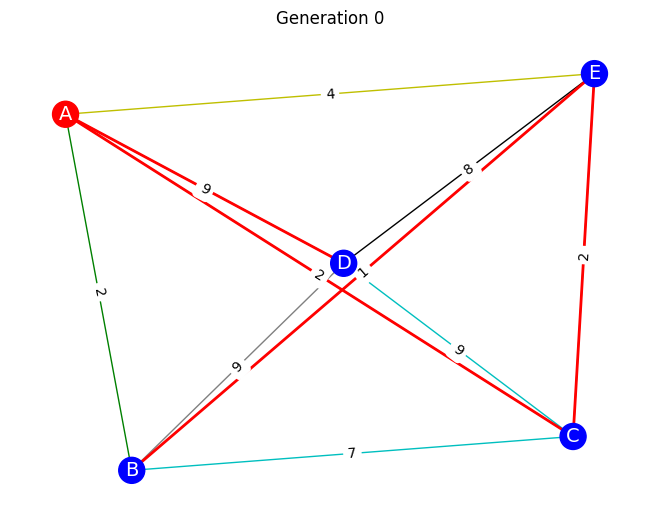

Generation 1 - Chosen Path: ['D', 'A', 'C', 'E', 'B'], Attacked Node: A, Dropped Node: A, Shortest Path Length: 12.0


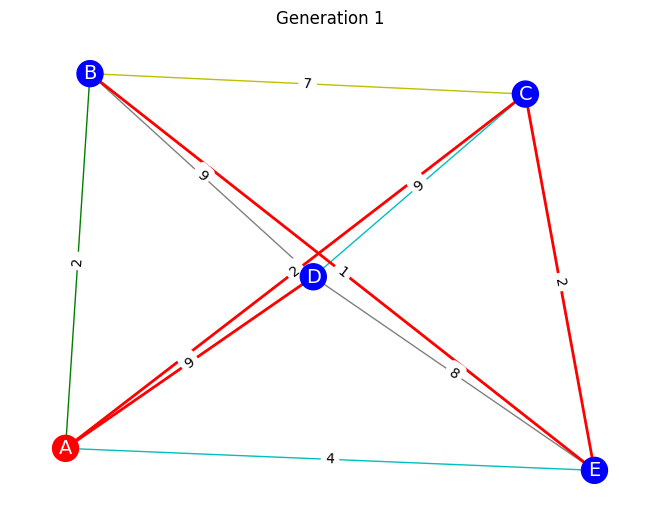

Generation 2 - Chosen Path: ['B', 'E', 'D', 'A', 'C'], Attacked Node: A, Dropped Node: A, Shortest Path Length: 12.0


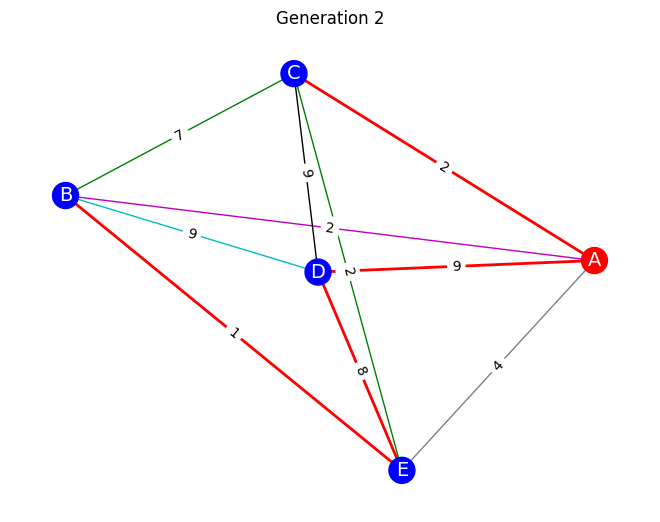

Generation 3 - Chosen Path: ['D', 'A', 'C', 'E', 'B'], Attacked Node: A, Dropped Node: A, Shortest Path Length: 12.0


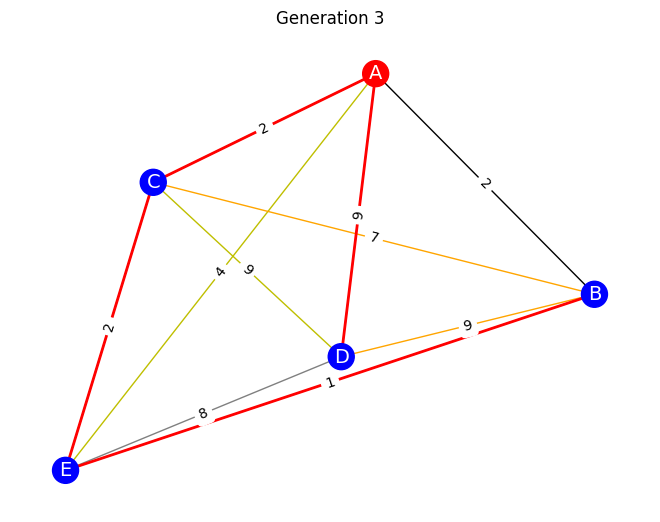

Generation 4 - Chosen Path: ['B', 'E', 'D', 'A', 'C'], Attacked Node: A, Dropped Node: A, Shortest Path Length: 12.0


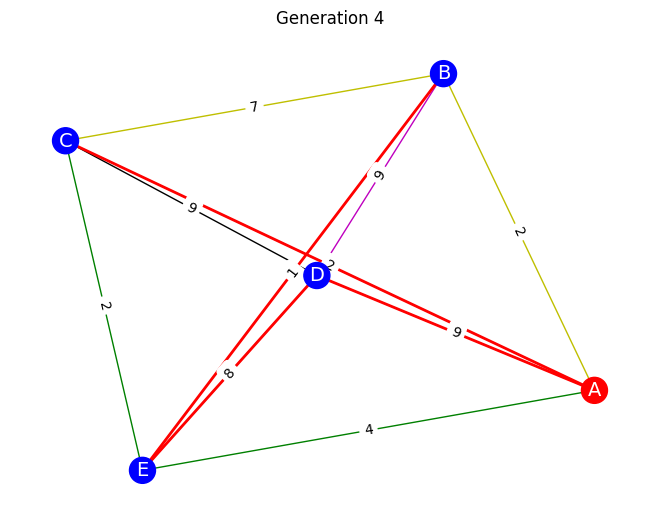

Generation 5 - Chosen Path: ['B', 'E', 'D', 'A', 'C'], Attacked Node: A, Dropped Node: A, Shortest Path Length: 12.0


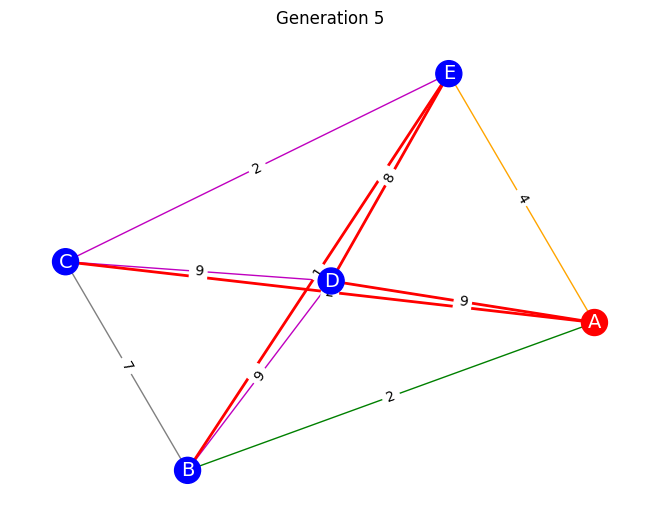

Generation 6 - Chosen Path: ['B', 'E', 'D', 'A', 'C'], Attacked Node: A, Dropped Node: A, Shortest Path Length: 12.0


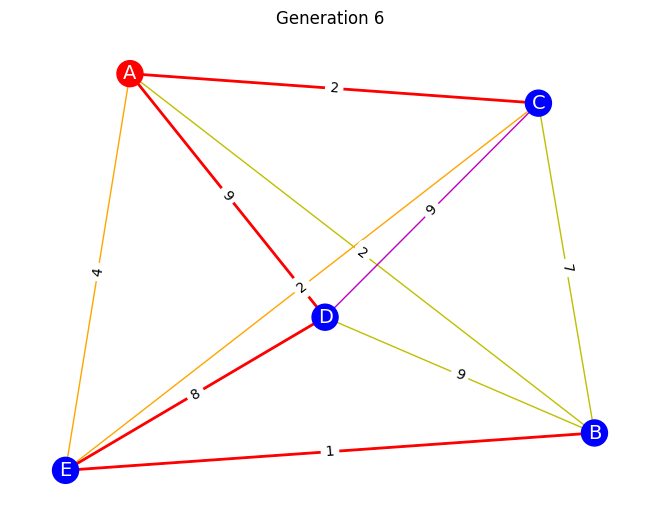

Generation 7 - Chosen Path: ['B', 'E', 'D', 'A', 'C'], Attacked Node: A, Dropped Node: A, Shortest Path Length: 12.0


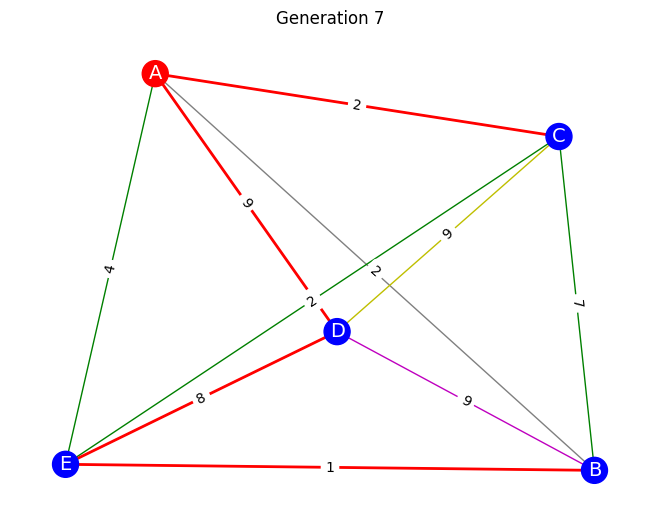

Generation 8 - Chosen Path: ['B', 'E', 'D', 'A', 'C'], Attacked Node: A, Dropped Node: A, Shortest Path Length: 12.0


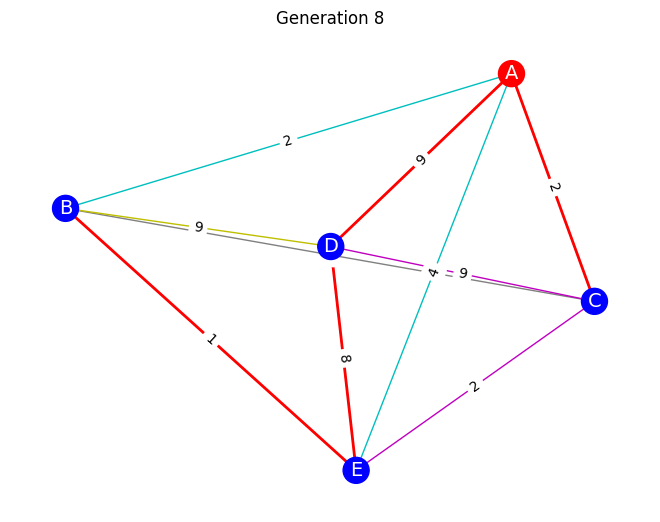

Generation 9 - Chosen Path: ['B', 'E', 'D', 'A', 'C'], Attacked Node: A, Dropped Node: A, Shortest Path Length: 12.0


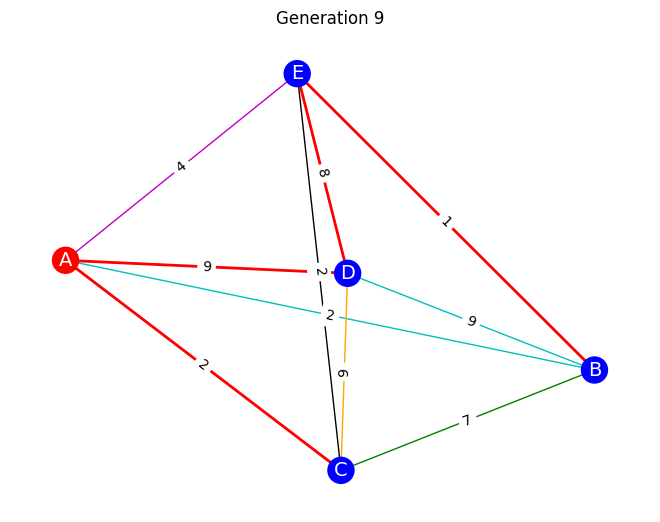

Best Path: ['B', 'E', 'D', 'A', 'C']
Shortest Path Length: 12.0
Average Energy Consumption: 1.3724173040194643
CPU Time: 3.8473310470581055 seconds


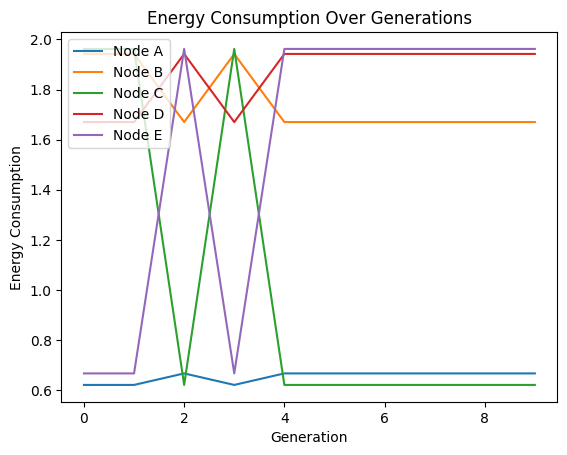

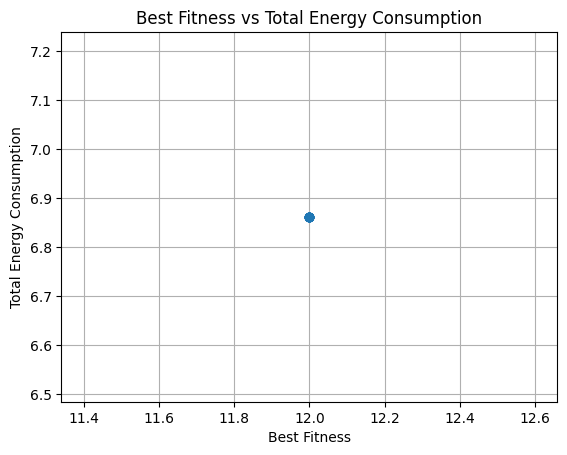

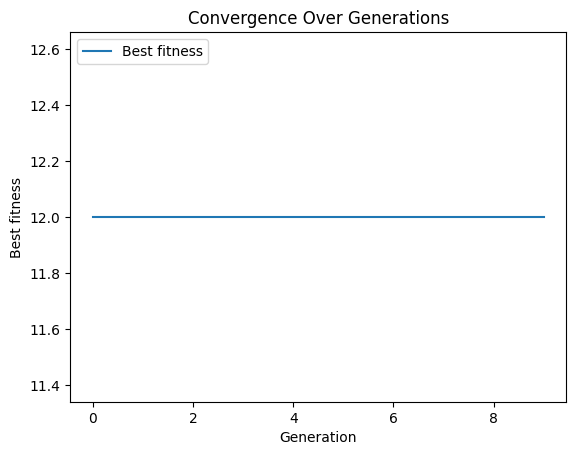

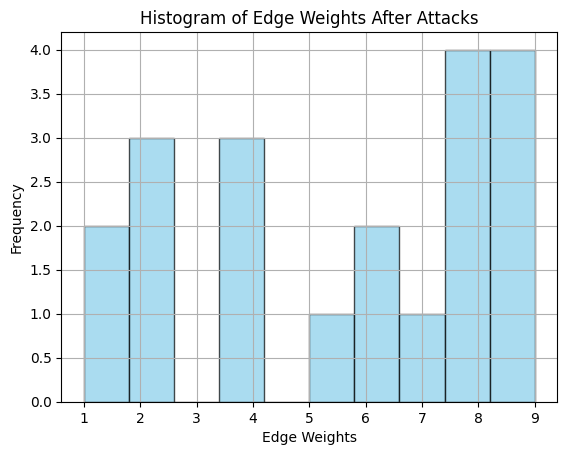

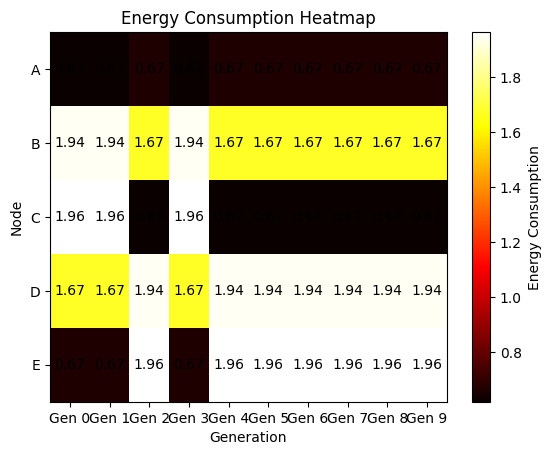

In [1]:
#test case 1
import random
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import time

# Define parameters
num_nodes = 5
node_labels = ['A', 'B', 'C', 'D', 'E']
population_size = 20
generations = 10
evaporation_rate = 0.1
pheromone_deposit = 1

# Initialize network graph
network = [[random.randint(1, 10) if i != j else 0 for i in range(num_nodes)] for j in range(num_nodes)]

# Energy consumption data for each node
energy_consumption = [random.uniform(0.5, 2.5) for _ in range(num_nodes)]

# Simulate black hole attack
attacked_node = random.randint(0, num_nodes - 1)
network[attacked_node][attacked_node] = 0

# ACO parameters
pheromone_matrix = [[1 / network[i][j] if network[i][j] > 0 else 0 for j in range(num_nodes)] for i in range(num_nodes)]

# Main ACO loop
energy_consumption_data = []
average_energy_consumption = []  # Store average energy consumption for each generation
best_fitness_data = []
best_path = []

# Define helper functions
def calculate_fitness(path, network):
    total_distance = sum(network[node_labels.index(path[i])][node_labels.index(path[i + 1])] for i in range(len(path) - 1))
    return 1 / total_distance if total_distance > 0 else 0

def evaporation(matrix, rate):
    for i in range(len(matrix)):
        for j in range(len(matrix[i])):
            matrix[i][j] *= (1 - rate)

def deposit_pheromone(matrix, path, fitness):
    for i in range(len(path) - 1):
        matrix[node_labels.index(path[i])][node_labels.index(path[i + 1])] += pheromone_deposit / fitness

# Measure CPU time
start_time = time.time()

# Main ACO loop
for generation in range(generations):
    ants = [[] for _ in range(population_size)]

    # Ants movement
    for ant in ants:
        current_node = random.choice(node_labels)  # Randomly select a starting node
        while len(ant) < num_nodes:
            ant.append(current_node)
            possible_moves = [node for node in node_labels if node != current_node and node not in ant and network[node_labels.index(current_node)][node_labels.index(node)] > 0]
            if possible_moves:
                probabilities = [pheromone_matrix[node_labels.index(current_node)][node_labels.index(node)] for node in possible_moves]
                total_probability = sum(probabilities)
                probabilities = [prob / total_probability for prob in probabilities]
                current_node = random.choices(possible_moves, weights=probabilities)[0]
            else:
                break  # No available moves

    # Update pheromone levels based on the best path found
    best_path = max(ants, key=lambda path: calculate_fitness(path, network))
    evaporation(pheromone_matrix, evaporation_rate)
    deposit_pheromone(pheromone_matrix, best_path, calculate_fitness(best_path, network))

    # Calculate energy consumption for the current generation
    generation_energy_consumption = [energy_consumption[node_labels.index(node)] for node in best_path]
    energy_consumption_data.append(generation_energy_consumption)

    # Find the best path in the current population
    best_fitness = calculate_fitness(best_path, network)
    shortest_path_length = 1 / best_fitness  # Calculate the shortest path length
    best_fitness_data.append(shortest_path_length)  # Append the shortest path length to the list

    # Print the chosen path, attacked node, dropped node, and path length for this iteration
    print(f"Generation {generation} - Chosen Path: {best_path}, Attacked Node: {node_labels[attacked_node]}, Dropped Node: {node_labels[attacked_node]}, Shortest Path Length: {shortest_path_length}")

    # Calculate and store average energy consumption for this generation
    avg_energy_consumption = sum(generation_energy_consumption) / num_nodes
    average_energy_consumption.append(avg_energy_consumption)

    # Create the network graph
    G = nx.Graph()
    for i in range(num_nodes):
        for j in range(i + 1, num_nodes):
            if network[i][j] > 0:  # Add edges only if the weight is greater than 0
                G.add_edge(node_labels[i], node_labels[j], weight=network[i][j])

    # Plot the network graph
    pos = nx.spring_layout(G)
    labels = {(node_labels[i], node_labels[j]): network[i][j] for i in range(num_nodes) for j in range(i + 1, num_nodes) if network[i][j] > 0}
    node_colors = ['r' if i == attacked_node else 'b' for i in range(num_nodes)]
    edge_colors = [random.choice(['g', 'grey', 'orange', 'c', 'y', 'm', 'k']) for _ in range(len(G.edges))]

    nx.draw(G, pos, with_labels=True, node_size=350, node_color=node_colors, edge_color=edge_colors, font_color='white', font_size=14)
    nx.draw_networkx_edges(G, pos, edgelist=[(best_path[i], best_path[i+1]) for i in range(len(best_path)-1)], edge_color='r', width=2.0)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    plt.title(f'Generation {generation}')
    plt.show()

# Print the best path and its length
print("Best Path:", best_path)
print("Shortest Path Length:", shortest_path_length)

# Calculate average energy consumption
average_energy_consumption = sum(average_energy_consumption) / generations
print("Average Energy Consumption:", average_energy_consumption)

# Measure and print CPU time
end_time = time.time()
cpu_time = end_time - start_time
print("CPU Time:", cpu_time, "seconds")

# Plot the energy consumption graph
plt.figure()
for i in range(num_nodes):
    plt.plot(range(generations), [data[i] for data in energy_consumption_data], label=f'Node {node_labels[i]}')
plt.xlabel('Generation')
plt.ylabel('Energy Consumption')
plt.legend(loc='upper left')
plt.title('Energy Consumption Over Generations')
plt.show()

# Plot the best fitness vs energy consumption graph
plt.figure()
plt.plot(best_fitness_data, [sum(data) for data in energy_consumption_data], marker='o', linestyle='-')
plt.xlabel('Best Fitness')
plt.ylabel('Total Energy Consumption')
plt.title('Best Fitness vs Total Energy Consumption')
plt.grid(True)
plt.show()

# Plot the convergence graph
plt.figure()
plt.plot(range(generations), best_fitness_data, label='Best fitness')
plt.xlabel('Generation')
plt.ylabel('Best fitness')
plt.legend(loc='upper left')
plt.title('Convergence Over Generations')
plt.show()

# Plot histogram of edge weights after attacks
plt.figure()
edge_weights_after_attack = [network[i][j] for i in range(num_nodes) for j in range(num_nodes) if network[i][j] > 0]
plt.hist(edge_weights_after_attack, bins=10, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Edge Weights')
plt.ylabel('Frequency')
plt.title('Histogram of Edge Weights After Attacks')
plt.grid(True)
plt.show()

# Plot heatmap for energy consumption of each node
plt.figure()
energy_consumption_array = np.array(energy_consumption_data)
plt.imshow(energy_consumption_array.T, cmap='hot', aspect='auto')

# Add annotations
for i in range(num_nodes):
    for j in range(generations):
        plt.text(j, i, f'{energy_consumption_array[j][i]:.2f}', ha='center', va='center', color='black')

plt.colorbar(label='Energy Consumption')
plt.xticks(range(generations), labels=[f'Gen {i}' for i in range(generations)])
plt.yticks(range(num_nodes), labels=node_labels)
plt.xlabel('Generation')
plt.ylabel('Node')
plt.title('Energy Consumption Heatmap')
plt.show()
